<a href="https://colab.research.google.com/github/jodogwu/Projects-Machine/blob/main/Vegan_Recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vegan Recipes Dataset Project**

### **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from collections import Counter
import re

### **Load Dataset**

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the Vegan Recipe dataset from Google Drive
vegan = pd.read_csv('/content/drive/My Drive/data.csv')

Mounted at /content/drive


In [ ]:
# Display the first few rows of the dataset
print(vegan.head())

                                  name                 collection  \
0              Chickpea & Potato Curry  collection/vegan-recipes/   
1  Crispy Tofu with Black Pepper Sauce  collection/vegan-recipes/   
2          Over-the-Rainbow Minestrone  collection/vegan-recipes/   
3  Simple Vegetarian Slow-Cooked Beans  collection/vegan-recipes/   
4          Vegetarian Black Bean Pasta  collection/vegan-recipes/   

   recipie_collection_idx                                              image  \
0                       1  https://www.tasteofhome.com/wp-content/uploads...   
1                       2  https://www.tasteofhome.com/wp-content/uploads...   
2                       3  https://www.tasteofhome.com/wp-content/uploads...   
3                       4  https://www.tasteofhome.com/wp-content/uploads...   
4                       5  https://www.tasteofhome.com/wp-content/uploads...   

                                        descripition  \
0  \n\n1\n/\n92\n\n\n\n\n\n\n\nChickpea & Potato

In [ ]:
vegan.head()

,name,collection,recipie_collection_idx,image,descripition,ingredients,steps,Neutretion
0,Chickpea & Potato Curry,collection/vegan-recipes/,1,https://www.tasteofhome.com/wp-content/uploads...,\n\n1\n/\n92\n\n\n\n\n\n\n\nChickpea & Potato ...,"['1 tablespoon canola oil', '1 medium onion, c...","['In a large skillet, heat oil over medium-hig...","<p>1-1/4 cups chickpea mixture: 240 calories, ..."
1,Crispy Tofu with Black Pepper Sauce,collection/vegan-recipes/,2,https://www.tasteofhome.com/wp-content/uploads...,\n\n2\n/\n92\n\n\n\n\n\n\n\n\nCrispy Tofu with...,"['2 tablespoons reduced-sodium soy sauce', '2 ...",['Mix the first 4 ingredients. Mince white par...,"<p>1 cup: 316 calories, 24g fat (2g saturated ..."
2,Over-the-Rainbow Minestrone,collection/vegan-recipes/,3,https://www.tasteofhome.com/wp-content/uploads...,\n\n3\n/\n92\n\n\n\n\n\n\n\nOver-the-Rainbow M...,"['1/2 pound Swiss chard', '2 tablespoons olive...",['Cut stems from chard; chop stems and leaves ...,"<p>1-1/2 cups: 231 calories, 7g fat (1g satura..."
3,Simple Vegetarian Slow-Cooked Beans,collection/vegan-recipes/,4,https://www.tasteofhome.com/wp-content/uploads...,\n\n4\n/\n92\n\n\n\n\n\n\n\nTaste of HomeSimpl...,['4 cans (15-1/2 ounces each) great northern b...,"['In a 3-qt. slow cooker, combine the first 7 ...","<p>3/4 cup: 229 calories, 3g fat (0 saturated ..."
4,Vegetarian Black Bean Pasta,collection/vegan-recipes/,5,https://www.tasteofhome.com/wp-content/uploads...,\n\n5\n/\n92\n\n\n\n\n\n\n\nTaste of HomeVeget...,"['9 ounces uncooked whole wheat fettuccine', '...",['Cook fettuccine according to package directi...,"<p>1-1/4 cups: 255 calories, 3g fat (0 saturat..."


In [ ]:
# Display basic information about the dataset
print(vegan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    87 non-null     object
 1   collection              87 non-null     object
 2   recipie_collection_idx  87 non-null     int64 
 3   image                   86 non-null     object
 4   descripition            87 non-null     object
 5   ingredients             87 non-null     object
 6   steps                   87 non-null     object
 7   Neutretion              87 non-null     object
dtypes: int64(1), object(7)
memory usage: 5.6+ KB
None


**Dataset Info**

*  The DataFrame contains 87 entries and 8 columns, providing comprehensive details about each recipe.

*   It includes columns for recipe names, collections, indices, images, descriptions, ingredients, steps, and possibly nutritional information.

*   One missing value in the image column indicates potential data cleaning needs






In [ ]:
# Rename the column 'Neutretion' to 'nutrition'
vegan.rename(columns={'Neutretion': 'nutrition'}, inplace=True)

### **Data Cleaning**

Ensure that nutritional values are numeric by converting the nutrition column from string to dictionary and extracting individual nutritional values.

In [ ]:
# Function to extract nutritional values and quantity
def extract_nutrition(nutrition_str):
    # Define the regex patterns for each nutrient
    patterns = {
        'calories': r'(\d+) calories',
        'fat': r'(\d+)g fat',
        'saturated_fat': r'\((\d+) saturated fat\)',
        'cholesterol': r'(\d+) cholesterol',
        'sodium': r'(\d+)mg sodium',
        'carbohydrate': r'(\d+)g carbohydrate',
        'sugars': r'(\d+)g sugars',
        'fiber': r'(\d+)g fiber',
        'protein': r'(\d+)g protein',
        'quantity': r'(\d+/\d+ cup|\d+ cup|\d+ serving|\d+ sandwich|\d+ piece|\d+ each|\d+ cracker)'
    }

    # Initialize a dictionary to hold the extracted values
    nutrition_data = {key: None for key in patterns}

    # Extract values using regex patterns
    for key, pattern in patterns.items():
        match = re.search(pattern, nutrition_str)
        if match:
            nutrition_data[key] = match.group(1)

    return nutrition_data



# Create a DataFrame
vegan = pd.DataFrame(vegan)

# Apply the function to the nutrition column
nutrition_data = vegan['nutrition'].apply(extract_nutrition)

# Create a new DataFrame from the extracted nutritional data
nutrition_df = pd.DataFrame(nutrition_data.tolist())

# Convert extracted values to numeric where appropriate
for col in ['calories', 'fat', 'saturated_fat', 'cholesterol', 'sodium', 'carbohydrate', 'sugars', 'fiber', 'protein']:
    nutrition_df[col] = pd.to_numeric(nutrition_df[col])

# Display the extracted data
print(nutrition_df)


    calories   fat  saturated_fat  cholesterol  sodium  carbohydrate  sugars  \
0        240   6.0            0.0          0.0     767            42     8.0   
1        316  24.0            NaN          0.0     583            20     8.0   
2        231   7.0            NaN          NaN    1015            34     7.0   
3        229   3.0            0.0          0.0     672            40     2.0   
4        255   3.0            0.0          0.0     230            45     4.0   
..       ...   ...            ...          ...     ...           ...     ...   
82        64   NaN            0.0          0.0      23            16    12.0   
83        65   5.0            NaN          0.0     226             5     2.0   
84        57   4.0            NaN          0.0      32             5     2.0   
85       143  10.0            NaN          0.0     260            11     NaN   
86       138   NaN            0.0          0.0     351            27     9.0   

    fiber  protein quantity  
0     9.0

In [ ]:
print(nutrition_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   calories       87 non-null     int64  
 1   fat            82 non-null     float64
 2   saturated_fat  31 non-null     float64
 3   cholesterol    85 non-null     float64
 4   sodium         87 non-null     int64  
 5   carbohydrate   87 non-null     int64  
 6   sugars         82 non-null     float64
 7   fiber          86 non-null     float64
 8   protein        85 non-null     float64
 9   quantity       82 non-null     object 
dtypes: float64(6), int64(3), object(1)
memory usage: 6.9+ KB
None


**Nutritional Profile:**

Essential nutrients such as calories, sodium, carbohydrate, sugars, fiber, and protein are mostly well-documented, providing a foundational view of each recipe's nutritional content.

In [ ]:
# Concatenate the original DataFrame with the new nutritional DataFrame
vegan = pd.concat([vegan, nutrition_df], axis=1)

In [ ]:
vegan.head()

,name,collection,recipie_collection_idx,image,descripition,ingredients,steps,nutrition,calories,fat,saturated_fat,cholesterol,sodium,carbohydrate,sugars,fiber,protein,quantity
0,Chickpea & Potato Curry,collection/vegan-recipes/,1,https://www.tasteofhome.com/wp-content/uploads...,\n\n1\n/\n92\n\n\n\n\n\n\n\nChickpea & Potato ...,"['1 tablespoon canola oil', '1 medium onion, c...","['In a large skillet, heat oil over medium-hig...","<p>1-1/4 cups chickpea mixture: 240 calories, ...",240,6.0,0.0,0.0,767,42,8.0,9.0,8.0,1/4 cup
1,Crispy Tofu with Black Pepper Sauce,collection/vegan-recipes/,2,https://www.tasteofhome.com/wp-content/uploads...,\n\n2\n/\n92\n\n\n\n\n\n\n\n\nCrispy Tofu with...,"['2 tablespoons reduced-sodium soy sauce', '2 ...",['Mix the first 4 ingredients. Mince white par...,"<p>1 cup: 316 calories, 24g fat (2g saturated ...",316,24.0,NaN,0.0,583,20,8.0,2.0,7.0,1 cup
2,Over-the-Rainbow Minestrone,collection/vegan-recipes/,3,https://www.tasteofhome.com/wp-content/uploads...,\n\n3\n/\n92\n\n\n\n\n\n\n\nOver-the-Rainbow M...,"['1/2 pound Swiss chard', '2 tablespoons olive...",['Cut stems from chard; chop stems and leaves ...,"<p>1-1/2 cups: 231 calories, 7g fat (1g satura...",231,7.0,NaN,NaN,1015,34,7.0,6.0,9.0,1/2 cup
3,Simple Vegetarian Slow-Cooked Beans,collection/vegan-recipes/,4,https://www.tasteofhome.com/wp-content/uploads...,\n\n4\n/\n92\n\n\n\n\n\n\n\nTaste of HomeSimpl...,['4 cans (15-1/2 ounces each) great northern b...,"['In a 3-qt. slow cooker, combine the first 7 ...","<p>3/4 cup: 229 calories, 3g fat (0 saturated ...",229,3.0,0.0,0.0,672,40,2.0,13.0,12.0,3/4 cup
4,Vegetarian Black Bean Pasta,collection/vegan-recipes/,5,https://www.tasteofhome.com/wp-content/uploads...,\n\n5\n/\n92\n\n\n\n\n\n\n\nTaste of HomeVeget...,"['9 ounces uncooked whole wheat fettuccine', '...",['Cook fettuccine according to package directi...,"<p>1-1/4 cups: 255 calories, 3g fat (0 saturat...",255,3.0,0.0,0.0,230,45,4.0,9.0,12.0,1/4 cup


In [ ]:
# Drop the specified columns from the vegan DataFrame
columns_to_drop = ['collection', 'recipie_collection_idx', 'descripition', 'nutrition', 'saturated_fat']
vegan.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the updated DataFrame
vegan.head()

,name,image,ingredients,steps,calories,fat,cholesterol,sodium,carbohydrate,sugars,fiber,protein,quantity
0,Chickpea & Potato Curry,https://www.tasteofhome.com/wp-content/uploads...,"['1 tablespoon canola oil', '1 medium onion, c...","['In a large skillet, heat oil over medium-hig...",240,6.0,0.0,767,42,8.0,9.0,8.0,1/4 cup
1,Crispy Tofu with Black Pepper Sauce,https://www.tasteofhome.com/wp-content/uploads...,"['2 tablespoons reduced-sodium soy sauce', '2 ...",['Mix the first 4 ingredients. Mince white par...,316,24.0,0.0,583,20,8.0,2.0,7.0,1 cup
2,Over-the-Rainbow Minestrone,https://www.tasteofhome.com/wp-content/uploads...,"['1/2 pound Swiss chard', '2 tablespoons olive...",['Cut stems from chard; chop stems and leaves ...,231,7.0,NaN,1015,34,7.0,6.0,9.0,1/2 cup
3,Simple Vegetarian Slow-Cooked Beans,https://www.tasteofhome.com/wp-content/uploads...,['4 cans (15-1/2 ounces each) great northern b...,"['In a 3-qt. slow cooker, combine the first 7 ...",229,3.0,0.0,672,40,2.0,13.0,12.0,3/4 cup
4,Vegetarian Black Bean Pasta,https://www.tasteofhome.com/wp-content/uploads...,"['9 ounces uncooked whole wheat fettuccine', '...",['Cook fettuccine according to package directi...,255,3.0,0.0,230,45,4.0,9.0,12.0,1/4 cup


In [ ]:
vegan.tail()

,name,image,ingredients,steps,calories,fat,cholesterol,sodium,carbohydrate,sugars,fiber,protein,quantity
82,German Red Cabbage,https://www.tasteofhome.com/wp-content/uploads...,"['1 medium onion, halved and sliced', '1 mediu...",['In a large Dutch oven coated with cooking sp...,64,NaN,0.0,23,16,12.0,2.0,1.0,1 cup
83,Roasted Rosemary Cauliflower,https://www.tasteofhome.com/wp-content/uploads...,['1 medium head cauliflower (about 2-1/2 pound...,['Preheat oven to 450°. Toss together all ingr...,65,5.0,0.0,226,5,2.0,2.0,2.0,3/4 cup
84,Grilled Cauliflower Wedges,https://www.tasteofhome.com/wp-content/uploads...,"['1 large head cauliflower ', '1 teaspoon grou...",['Remove leaves and trim stem from cauliflower...,57,4.0,0.0,32,5,2.0,2.0,2.0,None
85,Almond Vegetable Stir-Fry,https://www.tasteofhome.com/wp-content/uploads...,"['1 teaspoon cornstarch', '1 teaspoon sugar', ...","['In a small bowl, combine cornstarch and suga...",143,10.0,0.0,260,11,NaN,3.0,4.0,3/4 cup
86,Lentil-Tomato Soup,https://www.tasteofhome.com/wp-content/uploads...,"['4-1/2 cups water', '4 medium carrots, sliced...","['In a large saucepan, combine the water, carr...",138,NaN,0.0,351,27,9.0,9.0,8.0,3/4 cup


In [ ]:
# Check for missing values in the vegan DataFrame
missing_values = vegan.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

name            0
image           1
ingredients     0
steps           0
calories        0
fat             5
cholesterol     2
sodium          0
carbohydrate    0
sugars          5
fiber           1
protein         2
quantity        5
dtype: int64


In [ ]:
# Drop rows where 'image' is NaN
vegan = vegan.dropna(subset=['image'])

# Fill missing values with 0 for 'fat', 'cholesterol', 'sugars', 'fiber', 'protein'
columns_to_fill_zero = ['fat', 'cholesterol', 'sugars', 'fiber', 'protein']
vegan.loc[:, columns_to_fill_zero] = vegan.loc[:, columns_to_fill_zero].fillna(0)

# Fill missing values with '1 serving' for 'quantity'
vegan.loc[:, 'quantity'] = vegan.loc[:, 'quantity'].fillna('1 serving')


In [ ]:
vegan.head()

,name,image,ingredients,steps,calories,fat,cholesterol,sodium,carbohydrate,sugars,fiber,protein,quantity
0,Chickpea & Potato Curry,https://www.tasteofhome.com/wp-content/uploads...,"['1 tablespoon canola oil', '1 medium onion, c...","['In a large skillet, heat oil over medium-hig...",240,6.0,0.0,767,42,8.0,9.0,8.0,1/4 cup
1,Crispy Tofu with Black Pepper Sauce,https://www.tasteofhome.com/wp-content/uploads...,"['2 tablespoons reduced-sodium soy sauce', '2 ...",['Mix the first 4 ingredients. Mince white par...,316,24.0,0.0,583,20,8.0,2.0,7.0,1 cup
2,Over-the-Rainbow Minestrone,https://www.tasteofhome.com/wp-content/uploads...,"['1/2 pound Swiss chard', '2 tablespoons olive...",['Cut stems from chard; chop stems and leaves ...,231,7.0,0.0,1015,34,7.0,6.0,9.0,1/2 cup
3,Simple Vegetarian Slow-Cooked Beans,https://www.tasteofhome.com/wp-content/uploads...,['4 cans (15-1/2 ounces each) great northern b...,"['In a 3-qt. slow cooker, combine the first 7 ...",229,3.0,0.0,672,40,2.0,13.0,12.0,3/4 cup
4,Vegetarian Black Bean Pasta,https://www.tasteofhome.com/wp-content/uploads...,"['9 ounces uncooked whole wheat fettuccine', '...",['Cook fettuccine according to package directi...,255,3.0,0.0,230,45,4.0,9.0,12.0,1/4 cup


In [ ]:
vegan.tail()

,name,image,ingredients,steps,calories,fat,cholesterol,sodium,carbohydrate,sugars,fiber,protein,quantity
82,German Red Cabbage,https://www.tasteofhome.com/wp-content/uploads...,"['1 medium onion, halved and sliced', '1 mediu...",['In a large Dutch oven coated with cooking sp...,64,0.0,0.0,23,16,12.0,2.0,1.0,1 cup
83,Roasted Rosemary Cauliflower,https://www.tasteofhome.com/wp-content/uploads...,['1 medium head cauliflower (about 2-1/2 pound...,['Preheat oven to 450°. Toss together all ingr...,65,5.0,0.0,226,5,2.0,2.0,2.0,3/4 cup
84,Grilled Cauliflower Wedges,https://www.tasteofhome.com/wp-content/uploads...,"['1 large head cauliflower ', '1 teaspoon grou...",['Remove leaves and trim stem from cauliflower...,57,4.0,0.0,32,5,2.0,2.0,2.0,1 serving
85,Almond Vegetable Stir-Fry,https://www.tasteofhome.com/wp-content/uploads...,"['1 teaspoon cornstarch', '1 teaspoon sugar', ...","['In a small bowl, combine cornstarch and suga...",143,10.0,0.0,260,11,0.0,3.0,4.0,3/4 cup
86,Lentil-Tomato Soup,https://www.tasteofhome.com/wp-content/uploads...,"['4-1/2 cups water', '4 medium carrots, sliced...","['In a large saucepan, combine the water, carr...",138,0.0,0.0,351,27,9.0,9.0,8.0,3/4 cup


In [ ]:
# Check for missing values in the vegan DataFrame
missing_values = vegan.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

name            0
image           0
ingredients     0
steps           0
calories        0
fat             0
cholesterol     0
sodium          0
carbohydrate    0
sugars          0
fiber           0
protein         0
quantity        0
dtype: int64


In [ ]:
print(vegan.info())

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 86
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          86 non-null     object 
 1   image         86 non-null     object 
 2   ingredients   86 non-null     object 
 3   steps         86 non-null     object 
 4   calories      86 non-null     int64  
 5   fat           86 non-null     float64
 6   cholesterol   86 non-null     float64
 7   sodium        86 non-null     int64  
 8   carbohydrate  86 non-null     int64  
 9   sugars        86 non-null     float64
 10  fiber         86 non-null     float64
 11  protein       86 non-null     float64
 12  quantity      86 non-null     object 
dtypes: float64(5), int64(3), object(5)
memory usage: 9.4+ KB
None


In [ ]:
# Generate summary statistics
summary_statistics = vegan.describe()

# Print the summary statistics
print(summary_statistics)

         calories        fat  cholesterol       sodium  carbohydrate  \
count   86.000000  86.000000         86.0    86.000000     86.000000   
mean   206.267442   7.174419          0.0   449.220930     30.186047   
std    113.516252   5.238302          0.0   286.830936     19.943751   
min     15.000000   0.000000          0.0     4.000000      3.000000   
25%    110.250000   4.000000          0.0   218.500000     12.000000   
50%    195.000000   6.000000          0.0   395.000000     29.000000   
75%    287.750000  10.000000          0.0   642.750000     45.000000   
max    475.000000  24.000000          0.0  1385.000000     82.000000   

          sugars      fiber    protein  
count  86.000000  86.000000  86.000000  
mean    6.418605   5.523256   6.720930  
std     5.592990   3.702866   4.878889  
min     0.000000   0.000000   0.000000  
25%     2.000000   2.250000   2.000000  
50%     6.000000   4.500000   5.000000  
75%     9.000000   9.000000  11.000000  
max    37.000000  15.00

**Here are key insights from the Summary Statistics:**

**Low Cholesterol:**The dataset contains zero cholesterol values , indicating that all the vegan recipes are cholesterol-free foods.

**Caloric Range:** There’s a wide range in calorie content from 15 to 475 calories, suggesting a diverse set of foods from very light to more calorie-dense options.

**Moderate Fat Content**: The average fat content is relatively low at 7.17g, with most foods (75%) having 10g of fat or less.

**Carbohydrates:** Carbohydrates vary significantly (std: 19.94g), with an average of 30.18g, indicating a mix of low and high-carb food items.

**Fiber and Protein:** Both fiber and protein show a healthy presence with averages above 5g, which is beneficial for a balanced diet.

**Sugars Variation:**The sugar content shows considerable variation (std: 5.59g), with a mean of 6.42g. This suggests that while some foods in the dataset may be low in sugars, others could be significantly higher, impacting the overall dietary sugar intake.

In [ ]:
# Function to extract the last word before each comma and ignore words in brackets
def extract_last_words(text):
    # Remove anything in brackets
    text = re.sub(r'\(.*?\)', '', text)
    # Split the text by commas
    phrases = re.split(r',', text)
    # Extract the last word from each phrase
    last_words = [phrase.strip().split()[-1] for phrase in phrases if phrase.strip()]
    return ', '.join(last_words)

# Apply the function to the 'ingredient' column
vegan['extracted_ingredients'] = vegan['ingredients'].apply(extract_last_words)

# Print the DataFrame with the new column
print(vegan[['ingredients', 'extracted_ingredients']])

                                          ingredients  \
0   ['1 tablespoon canola oil', '1 medium onion, c...   
1   ['2 tablespoons reduced-sodium soy sauce', '2 ...   
2   ['1/2 pound Swiss chard', '2 tablespoons olive...   
3   ['4 cans (15-1/2 ounces each) great northern b...   
4   ['9 ounces uncooked whole wheat fettuccine', '...   
..                                                ...   
82  ['1 medium onion, halved and sliced', '1 mediu...   
83  ['1 medium head cauliflower (about 2-1/2 pound...   
84  ['1 large head cauliflower ', '1 teaspoon grou...   
85  ['1 teaspoon cornstarch', '1 teaspoon sugar', ...   
86  ['4-1/2 cups water', '4 medium carrots, sliced...   

                                extracted_ingredients  
0   oil', onion, chopped', cloves, minced', ginger...  
1   sauce', sauce', sugar', vinegar', onions', tof...  
2   chard', oil', onion, chopped', broth', tomatoe...  
3   beans, drained', carrots, ', stock', cloves, m...  
4   fettuccine', oil', mushrooms', 

In [ ]:
vegan.head()

,name,image,ingredients,steps,calories,fat,cholesterol,sodium,carbohydrate,sugars,fiber,protein,quantity,extracted_ingredients
0,Chickpea & Potato Curry,https://www.tasteofhome.com/wp-content/uploads...,"['1 tablespoon canola oil', '1 medium onion, c...","['In a large skillet, heat oil over medium-hig...",240,6.0,0.0,767,42,8.0,9.0,8.0,1/4 cup,"oil', onion, chopped', cloves, minced', ginger..."
1,Crispy Tofu with Black Pepper Sauce,https://www.tasteofhome.com/wp-content/uploads...,"['2 tablespoons reduced-sodium soy sauce', '2 ...",['Mix the first 4 ingredients. Mince white par...,316,24.0,0.0,583,20,8.0,2.0,7.0,1 cup,"sauce', sauce', sugar', vinegar', onions', tof..."
2,Over-the-Rainbow Minestrone,https://www.tasteofhome.com/wp-content/uploads...,"['1/2 pound Swiss chard', '2 tablespoons olive...",['Cut stems from chard; chop stems and leaves ...,231,7.0,0.0,1015,34,7.0,6.0,9.0,1/2 cup,"chard', oil', onion, chopped', broth', tomatoe..."
3,Simple Vegetarian Slow-Cooked Beans,https://www.tasteofhome.com/wp-content/uploads...,['4 cans (15-1/2 ounces each) great northern b...,"['In a 3-qt. slow cooker, combine the first 7 ...",229,3.0,0.0,672,40,2.0,13.0,12.0,3/4 cup,"beans, drained', carrots, ', stock', cloves, m..."
4,Vegetarian Black Bean Pasta,https://www.tasteofhome.com/wp-content/uploads...,"['9 ounces uncooked whole wheat fettuccine', '...",['Cook fettuccine according to package directi...,255,3.0,0.0,230,45,4.0,9.0,12.0,1/4 cup,"fettuccine', oil', mushrooms', clove, minced',..."


In [ ]:
from collections import Counter

# Assuming 'vegan' is your DataFrame and 'ingredients' is the column with ingredients lists
all_ingredients = vegan['extracted_ingredients'].str.split(', ').sum()

# Count the frequency of each ingredient
ingredient_counts = Counter(all_ingredients)

# Display the frequency of each ingredient
for extracted_ingredients, count in ingredient_counts.items():
  print(f"{extracted_ingredients}: {count}")

oil': 62
onion: 25
chopped': 65
cloves: 29
minced': 30
gingerroot': 3
coriander': 3
masala': 2
powder': 12
salt': 59
cumin': 11
turmeric': 4
tomatoes': 8
beans: 26
drained': 33
potato: 3
cubes': 5
stock': 5
juice': 26
cilantro': 6
rice': 7
wedges']: 1
sauce': 12
sugar': 13
vinegar': 20
onions': 3
tofu: 4
cornstarch': 3
oil: 12
': 35
peas: 3
sliced': 21
pepper': 36
gingerroot']: 1
chard': 1
broth': 13
tomatoes: 22
undrained': 12
chickpeas: 5
zucchini: 7
slices': 4
pepper: 15
carrot: 4
shells': 1
pesto': 2
pesto: 1
cheese: 1
basil']: 1
carrots: 11
spinach: 2
parsley']: 2
fettuccine': 1
mushrooms': 5
clove: 10
rosemary: 4
crushed': 6
oregano': 9
spinach']: 1
mushrooms: 4
halved': 6
lengthwise': 3
endive': 1
'VINAIGRETTE:': 3
mustard': 2
zest': 7
seed: 1
oil']: 2
cinnamon': 5
oranges']: 1
potatoes: 9
cauliflower: 5
']: 4
wedges': 7
peppers: 5
paprika': 8
seasoning': 4
pepper']: 20
florets': 3
diced': 5
ribs: 5
flakes': 6
leaves': 4
wedges: 1
onions: 13
ginger': 1
bulgur': 1
raisins': 4
cil

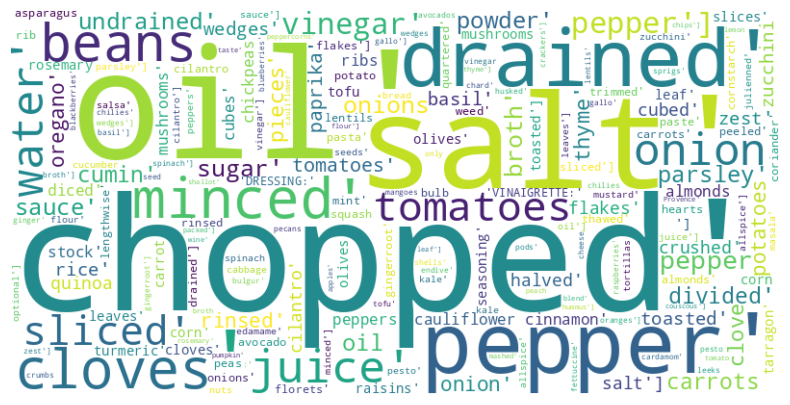

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the Counter object to a dictionary
ingredient_freq = dict(ingredient_counts)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ingredient_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


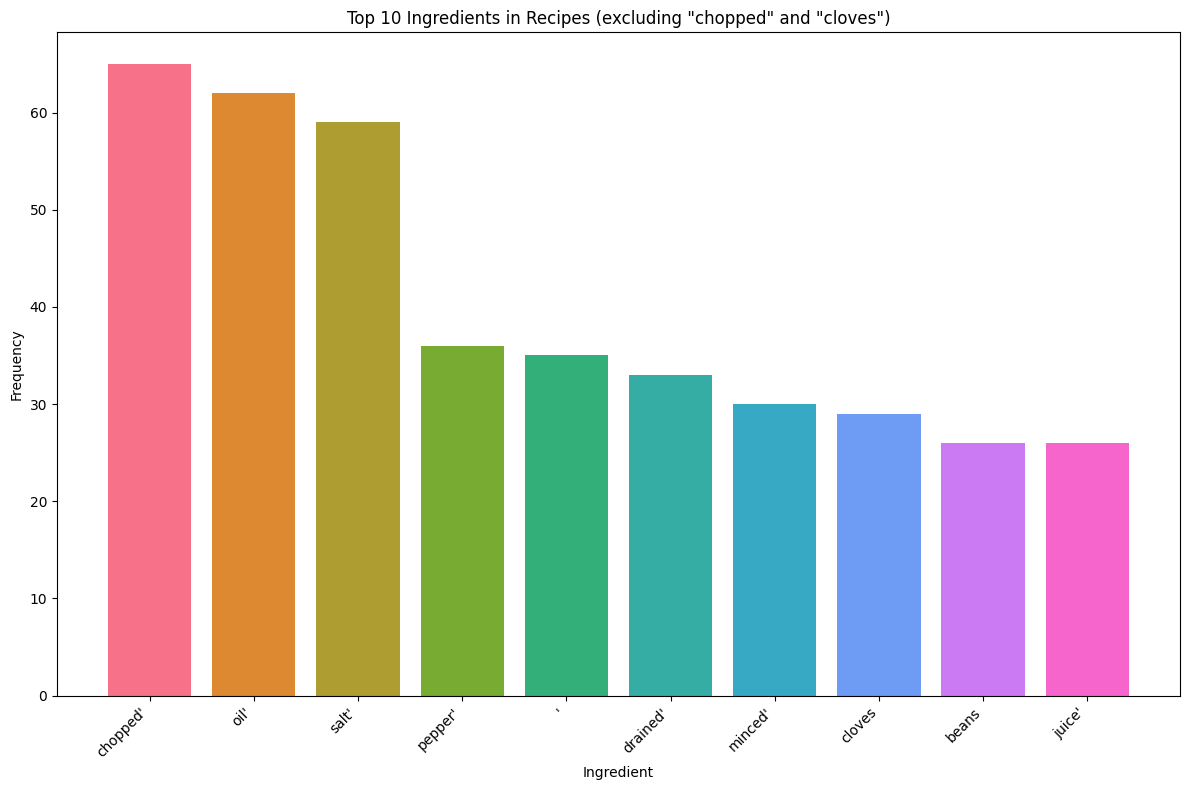

In [ ]:
# Concatenate all extracted ingredients into a single list
all_ingredients = ', '.join(vegan['extracted_ingredients']).split(', ')

# Count the frequency of each ingredient
ingredient_counts = Counter(all_ingredients)

# Convert the Counter object to a dictionary
ingredient_freq = dict(ingredient_counts)

# Get the top 10 ingredients
top_10_ingredients = dict(Counter(ingredient_freq).most_common(10))

# Define a color palette with 10 different colors
colors = sns.color_palette("husl", len(top_10_ingredients))

# Plotting the histogram with different colors
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_ingredients.keys(), top_10_ingredients.values(), color=colors)
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.title('Top 10 Ingredients in Recipes (excluding "chopped" and "cloves")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


Top most frequently used Ingredients for the vegan recipes are Oil, salt, pepper, beans and onion

In [ ]:
# Define a function to count the number of steps in a recipe
def count_steps(recipe_text):
    # Split the text by periods to get individual sentences
    steps = recipe_text.split('. ')
    # Count the number of steps, excluding empty ones
    return len([step for step in steps if step.strip()])

In [ ]:
# Apply the function to each recipe in the 'steps' column and create a new column 'number_of_steps'
vegan['number_of_steps'] = vegan['steps'].apply(count_steps)

In [ ]:
vegan.head()

,name,image,ingredients,steps,calories,fat,cholesterol,sodium,carbohydrate,sugars,fiber,protein,quantity,extracted_ingredients,number_of_steps
0,Chickpea & Potato Curry,https://www.tasteofhome.com/wp-content/uploads...,"['1 tablespoon canola oil', '1 medium onion, c...","['In a large skillet, heat oil over medium-hig...",240,6.0,0.0,767,42,8.0,9.0,8.0,1/4 cup,"oil', onion, chopped', cloves, minced', ginger...",6
1,Crispy Tofu with Black Pepper Sauce,https://www.tasteofhome.com/wp-content/uploads...,"['2 tablespoons reduced-sodium soy sauce', '2 ...",['Mix the first 4 ingredients. Mince white par...,316,24.0,0.0,583,20,8.0,2.0,7.0,1 cup,"sauce', sauce', sugar', vinegar', onions', tof...",14
2,Over-the-Rainbow Minestrone,https://www.tasteofhome.com/wp-content/uploads...,"['1/2 pound Swiss chard', '2 tablespoons olive...",['Cut stems from chard; chop stems and leaves ...,231,7.0,0.0,1015,34,7.0,6.0,9.0,1/2 cup,"chard', oil', onion, chopped', broth', tomatoe...",9
3,Simple Vegetarian Slow-Cooked Beans,https://www.tasteofhome.com/wp-content/uploads...,['4 cans (15-1/2 ounces each) great northern b...,"['In a 3-qt. slow cooker, combine the first 7 ...",229,3.0,0.0,672,40,2.0,13.0,12.0,3/4 cup,"beans, drained', carrots, ', stock', cloves, m...",4
4,Vegetarian Black Bean Pasta,https://www.tasteofhome.com/wp-content/uploads...,"['9 ounces uncooked whole wheat fettuccine', '...",['Cook fettuccine according to package directi...,255,3.0,0.0,230,45,4.0,9.0,12.0,1/4 cup,"fettuccine', oil', mushrooms', clove, minced',...",6


In [ ]:
# Save cleaned DataFrame to a CSV file
cleaned_file_path = '/content/drive/My Drive/Vegan_Cleaned.csv'
vegan.to_csv(cleaned_file_path, index=False)

In [ ]:
# Generate summary statistics
summary_statistics = vegan.describe()

# Print the summary statistics
print(summary_statistics)

         calories        fat  cholesterol       sodium  carbohydrate  \
count   86.000000  86.000000         86.0    86.000000     86.000000   
mean   206.267442   7.174419          0.0   449.220930     30.186047   
std    113.516252   5.238302          0.0   286.830936     19.943751   
min     15.000000   0.000000          0.0     4.000000      3.000000   
25%    110.250000   4.000000          0.0   218.500000     12.000000   
50%    195.000000   6.000000          0.0   395.000000     29.000000   
75%    287.750000  10.000000          0.0   642.750000     45.000000   
max    475.000000  24.000000          0.0  1385.000000     82.000000   

          sugars      fiber    protein  number_of_steps  
count  86.000000  86.000000  86.000000         86.00000  
mean    6.418605   5.523256   6.720930          6.50000  
std     5.592990   3.702866   4.878889          3.00098  
min     0.000000   0.000000   0.000000          2.00000  
25%     2.000000   2.250000   2.000000          4.00000  
50%

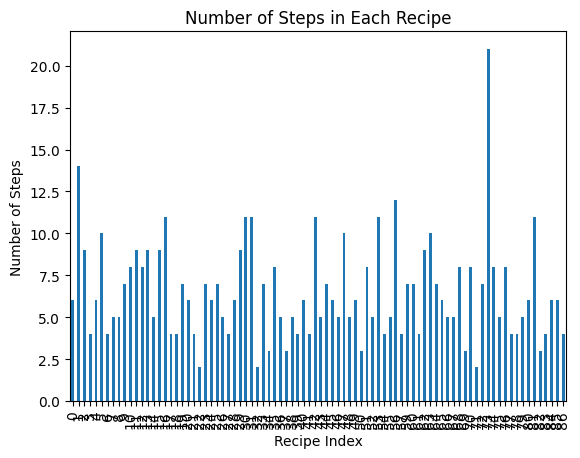

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'vegan' is your existing dataframe with the 'number_of_steps' column
# Plotting the bar chart
vegan['number_of_steps'].plot(kind='bar')

# Adding labels and title
plt.xlabel('Recipe Index')
plt.ylabel('Number of Steps')
plt.title('Number of Steps in Each Recipe')

# Displaying the plot
plt.show()

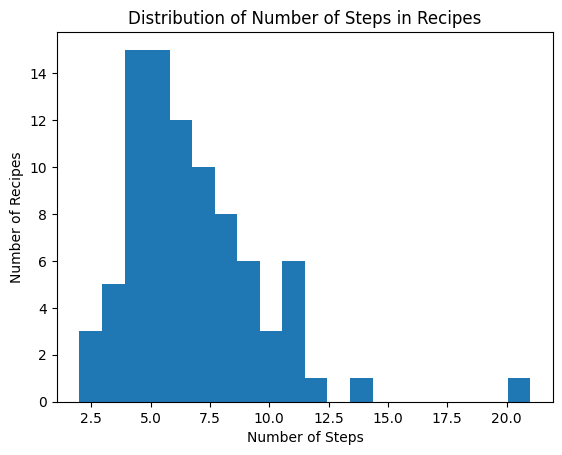

In [ ]:
# Plotting the histogram
vegan['number_of_steps'].plot(kind='hist', bins=20) # You can adjust the number of bins

# Adding labels and title
plt.xlabel('Number of Steps')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Number of Steps in Recipes')

# Displaying the plot
plt.show()

**Insights- Vegan Recipe Prep Steps**

**Moderate Complexity**: Most recipes have between 4 to 8 steps, indicating a moderate level of complexity.

**Common Number**: The most frequent number of steps is around 5, making it the typical length for recipes in this dataset.

**Few Extremes:** Very few recipes have fewer than 4 or more than 10 steps, showing a preference for recipes of moderate length.

**Long-Tail**: A small number of recipes are highly complex, with around 20 steps, representing detailed or elaborate recipes.

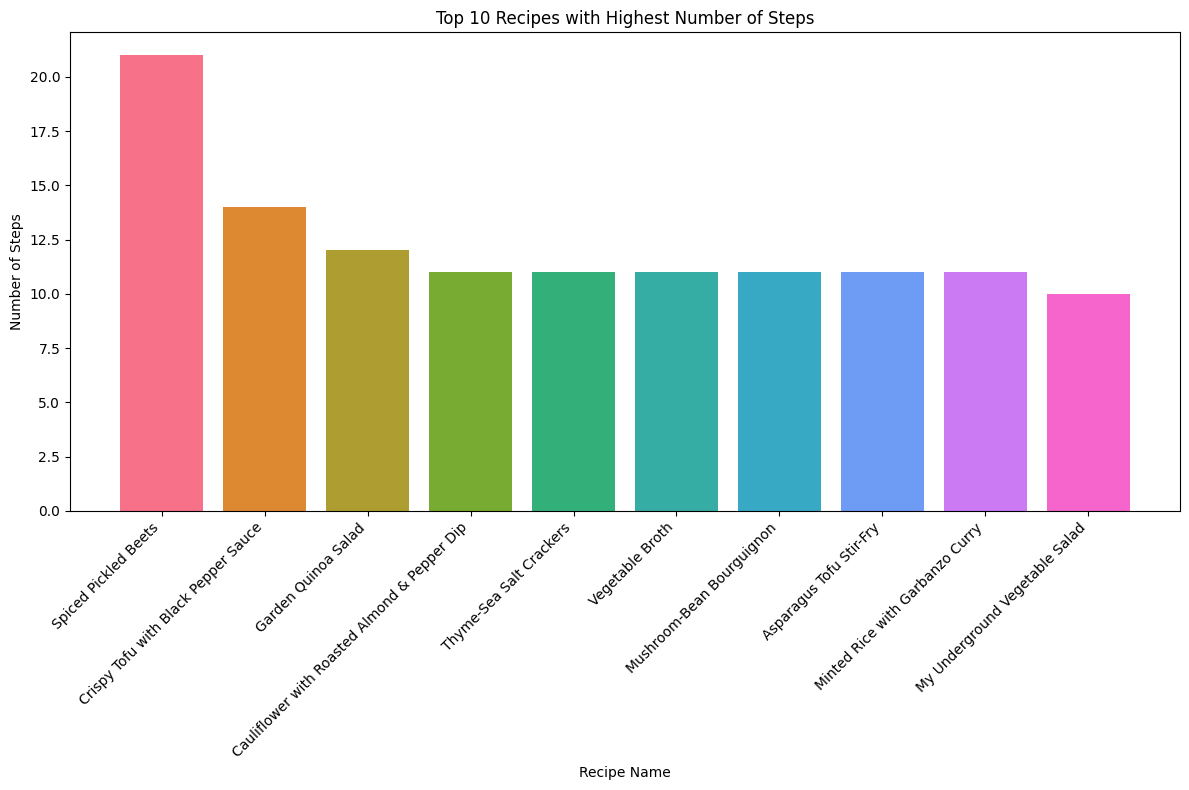

In [ ]:
# Sort the DataFrame by 'number_of_steps' in descending order and select the top 10
top_10_recipes = vegan.nlargest(10, 'number_of_steps')

# Define a color palette
colors = sns.color_palette("husl", len(top_10_recipes))

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_recipes['name'], top_10_recipes['number_of_steps'], color=colors)

# Adding labels and title
plt.xlabel('Recipe Name')
plt.ylabel('Number of Steps')
plt.title('Top 10 Recipes with Highest Number of Steps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()
plt.show()


**Recipe Complexity:**

*   The recipe with the highest number of steps is "Spiced Pickled Beets" with over 20 steps, indicating it is the most complex recipe in the dataset.

*   Other complex recipes include "Crispy Tofu with Black Pepper Sauce" and "Garden Quinoa Salad," each requiring more than 12 steps.



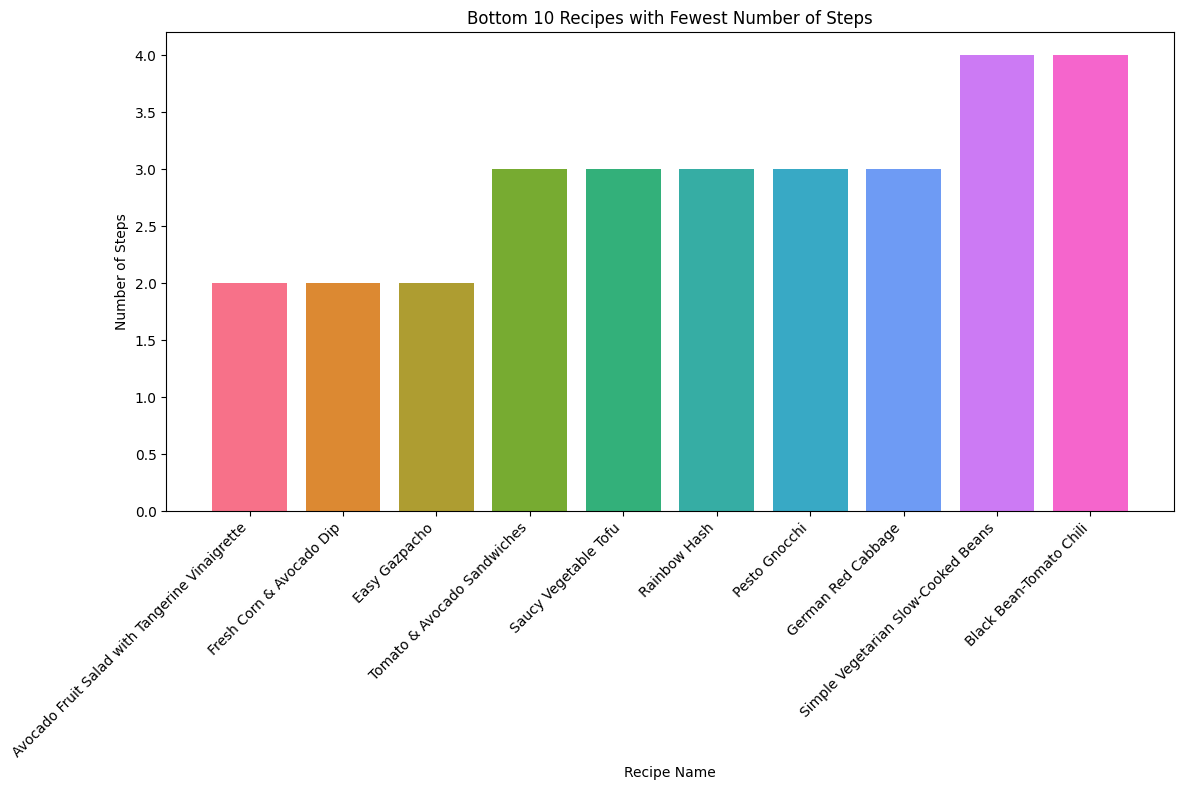

In [ ]:

# Sort the DataFrame by 'number_of_steps' in ascending order and select the bottom 10
bottom_10_recipes = vegan.nsmallest(10, 'number_of_steps')

# Define a color palette
colors = sns.color_palette("husl", len(bottom_10_recipes))

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(bottom_10_recipes['name'], bottom_10_recipes['number_of_steps'], color=colors)

# Adding labels and title
plt.xlabel('Recipe Name')
plt.ylabel('Number of Steps')
plt.title('Bottom 10 Recipes with Fewest Number of Steps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()
plt.show()



**Simplest Recipes:**

The simplest recipe is "Fruit Salad with Tangerine Vinaigrette," "Fresh Corn & Avocado Dip," and "Easy Gazpacho" with only 2 steps each. These recipes are quick and easy to prepare, ideal for beginners or those with limited time.




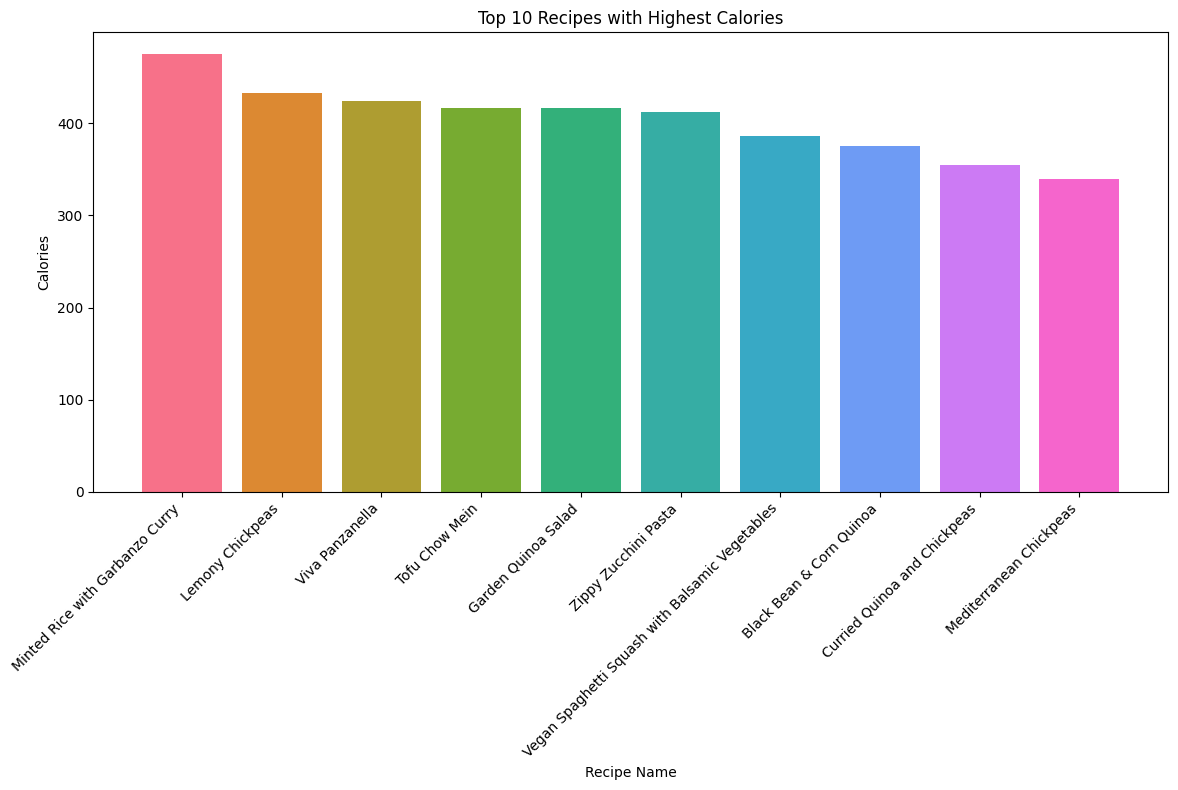

In [ ]:
# Sort the DataFrame by 'calories' in descending order and select the top 10
top_10_calories = vegan.nlargest(10, 'calories')

# Define a color palette
colors = sns.color_palette("husl", len(top_10_calories))

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_calories['name'], top_10_calories['calories'], color=colors)

# Adding labels and title
plt.xlabel('Recipe Name')
plt.ylabel('Calories')
plt.title('Top 10 Recipes with Highest Calories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()
plt.show()

**High-Calorie Recipes:**

The recipe with the highest calorie content is "Minted Rice with Garbanzo Curry," indicating it is a hearty and energy-dense option. This is followed by lemony chickpea, viva panzanella and Tofu Chow Mein

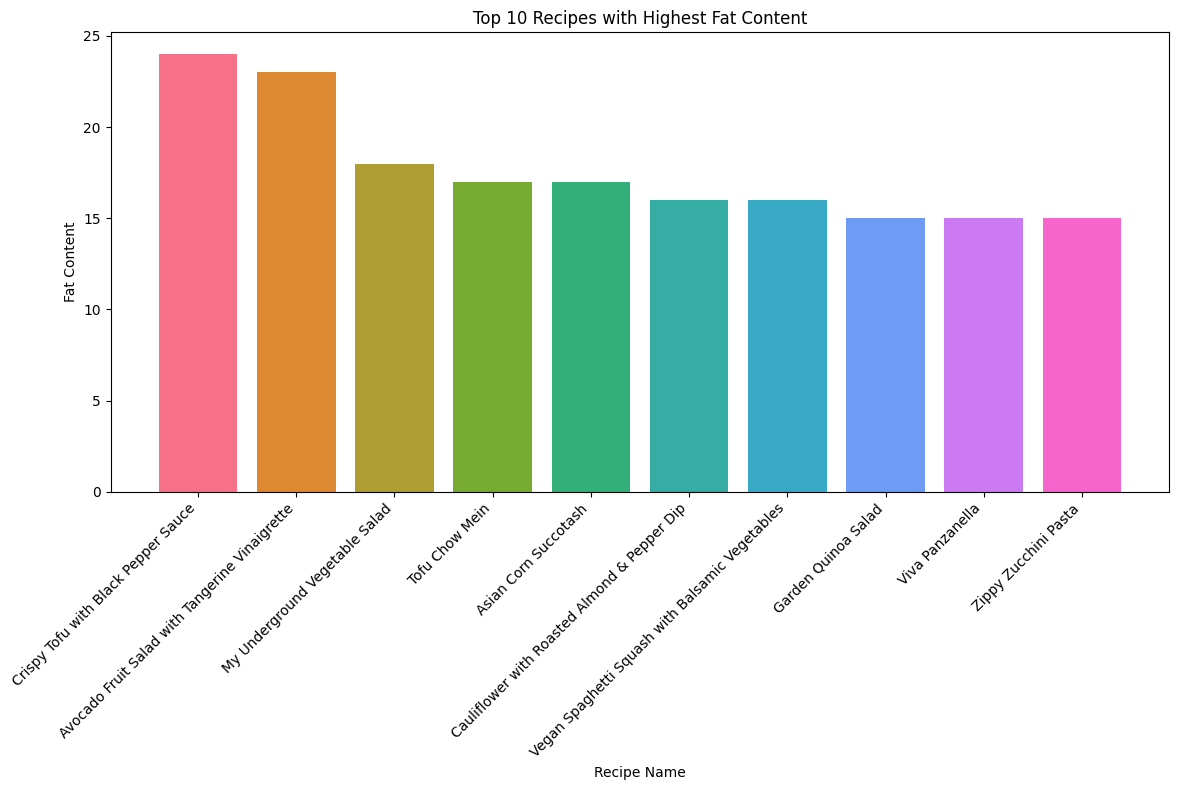

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming vegan DataFrame is already loaded with 'fat' and 'name' columns

# Sort the DataFrame by 'fat' in descending order and select the top 10
top_10_fat = vegan.nlargest(10, 'fat')

# Define a color palette
colors = sns.color_palette("husl", len(top_10_fat))

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_fat['name'], top_10_fat['fat'], color=colors)

# Adding labels and title
plt.xlabel('Recipe Name')
plt.ylabel('Fat Content')
plt.title('Top 10 Recipes with Highest Fat Content')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()
plt.show()


**High-Fat Content Recipes:**

The recipe with the highest fat content is "Crispy Tofu with Black Pepper Sauce," . This is followed by Avocado fruit salad with Tangerine Vinaigrette lemony chickpea, My Underground Vegetable Salad and Tofu Chow Mein



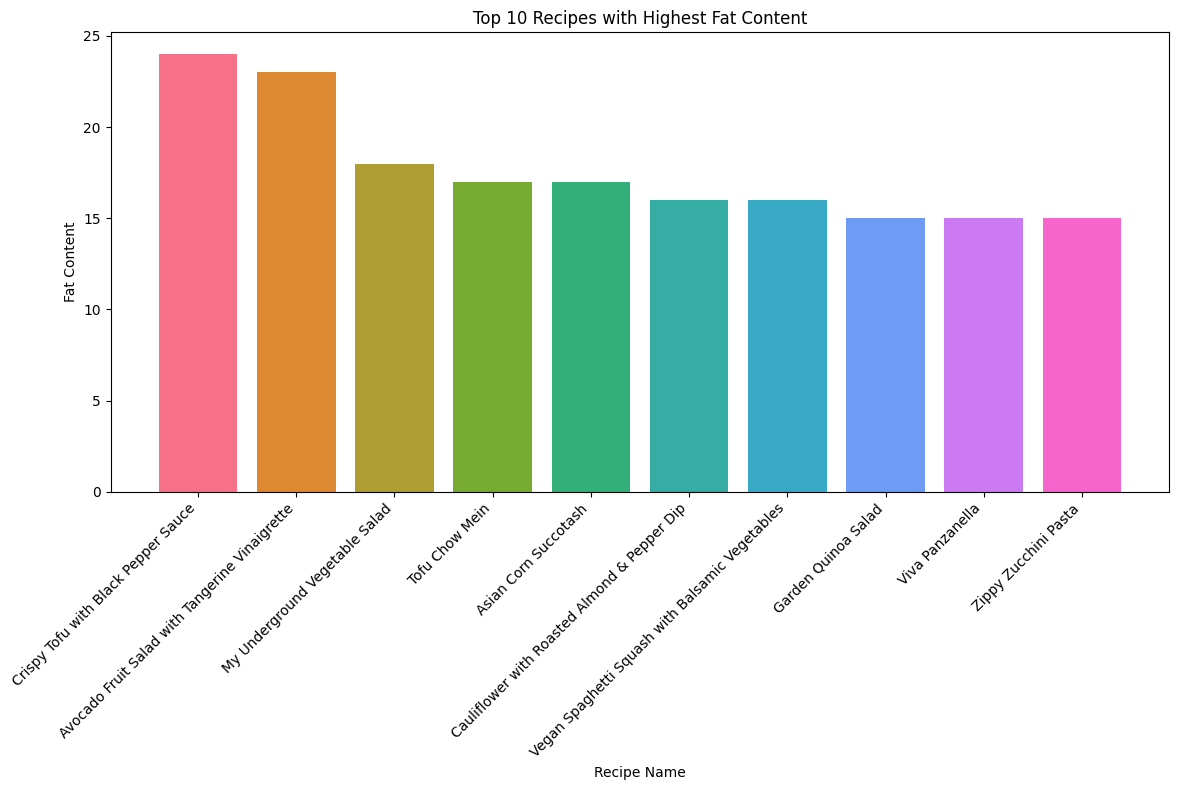

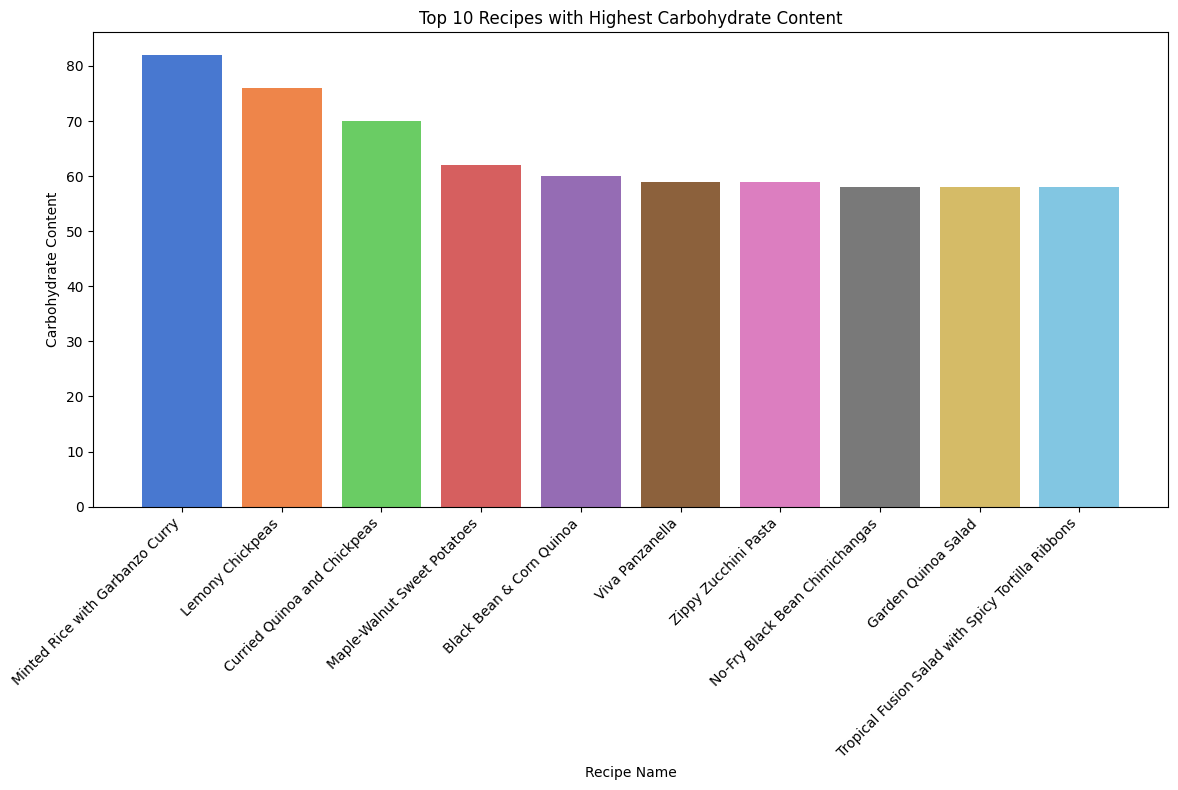

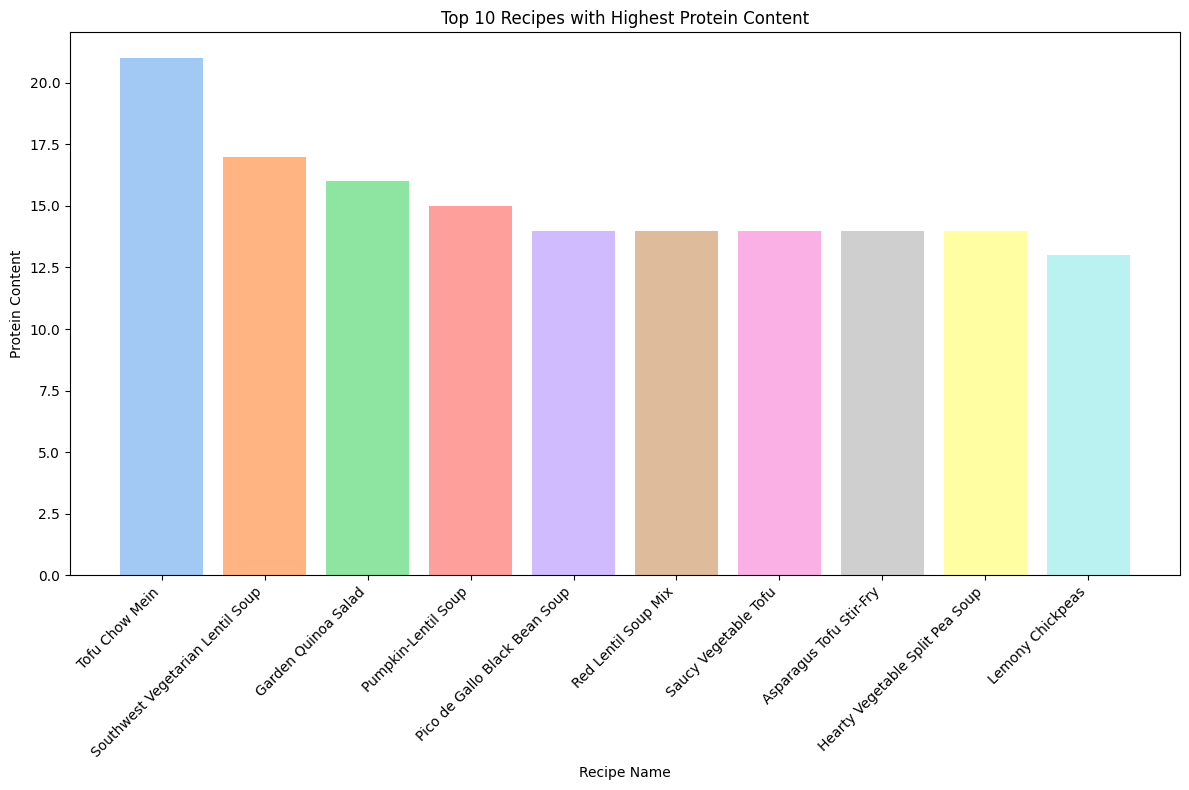

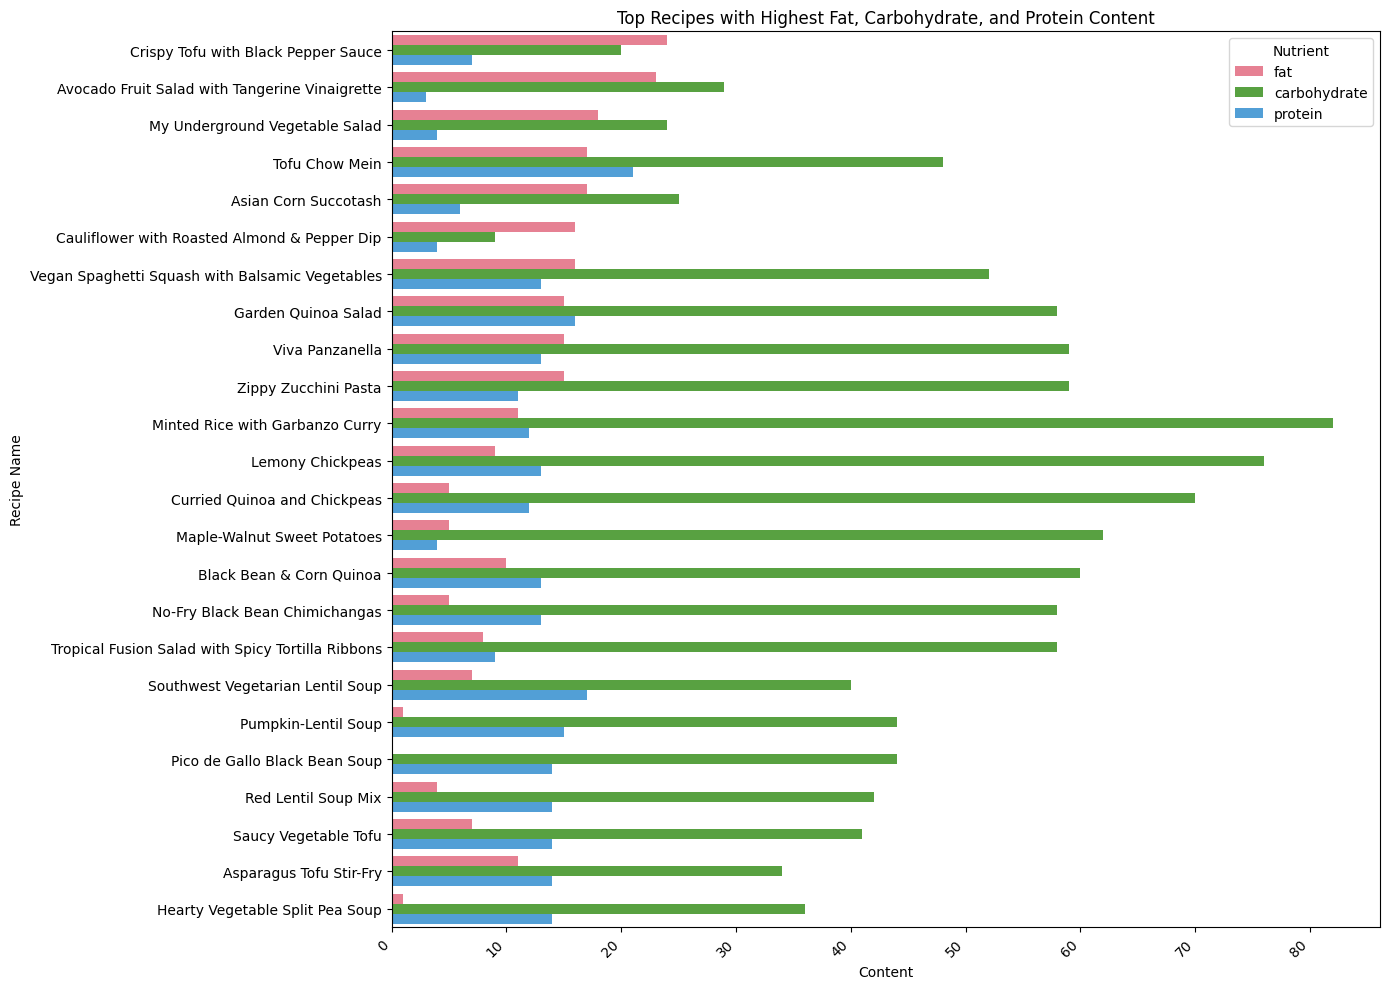

In [ ]:
# Sort the DataFrame by 'fat' in descending order and select the top 10
top_10_fat = vegan.nlargest(10, 'fat')
top_10_carbs = vegan.nlargest(10, 'carbohydrate')
top_10_protein = vegan.nlargest(10, 'protein')

# Define a function to plot bar charts
def plot_top_10(df, nutrient, color_palette):
    plt.figure(figsize=(12, 8))
    colors = sns.color_palette(color_palette, len(df))
    bars = plt.bar(df['name'], df[nutrient], color=colors)

    # Adding labels and title
    plt.xlabel('Recipe Name')
    plt.ylabel(f'{nutrient.capitalize()} Content')
    plt.title(f'Top 10 Recipes with Highest {nutrient.capitalize()} Content')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Plotting the bar charts
plot_top_10(top_10_fat, 'fat', "husl")
plot_top_10(top_10_carbs, 'carbohydrate', "muted")
plot_top_10(top_10_protein, 'protein', "pastel")


# Combined Bar Chart for Fat, Carbohydrate, and Protein


# Sort the DataFrame by 'fat', 'carbohydrate', and 'protein' in descending order and select the top 10 for each
top_10_fat = vegan.nlargest(10, 'fat')
top_10_carbs = vegan.nlargest(10, 'carbohydrate')
top_10_protein = vegan.nlargest(10, 'protein')

# Combine the top 10 lists into a single DataFrame
top_nutrients = pd.concat([top_10_fat, top_10_carbs, top_10_protein]).drop_duplicates()

# Reshape the DataFrame for plotting
top_nutrients_melted = top_nutrients.melt(id_vars=['name'], value_vars=['fat', 'carbohydrate', 'protein'],
                                          var_name='Nutrient', value_name='Value')

# Plotting the combined bar chart
plt.figure(figsize=(14, 10))
sns.barplot(x='Value', y='name', hue='Nutrient', data=top_nutrients_melted, palette='husl')

# Adding labels and title
plt.xlabel('Content')
plt.ylabel('Recipe Name')
plt.title('Top Recipes with Highest Fat, Carbohydrate, and Protein Content')
plt.legend(title='Nutrient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()
plt.show()

**High-Protein Content Recipes:**

The recipe with the highest protein content is "Tofu Chow Mein," . This is followed by Southwest Vegetarian Lentil Soup, Garden Quinoa Salad and Pumpkin Lentil-Soup


**High Carbohydrates Content Recipes**

The recipe with the highest carb content recipe is the "Minted Rice with Garbanzo Curry". next to this is the Lemony Chickpeas, Curried Quinoa and chickpea, Maple-Walnut Sweet Potato



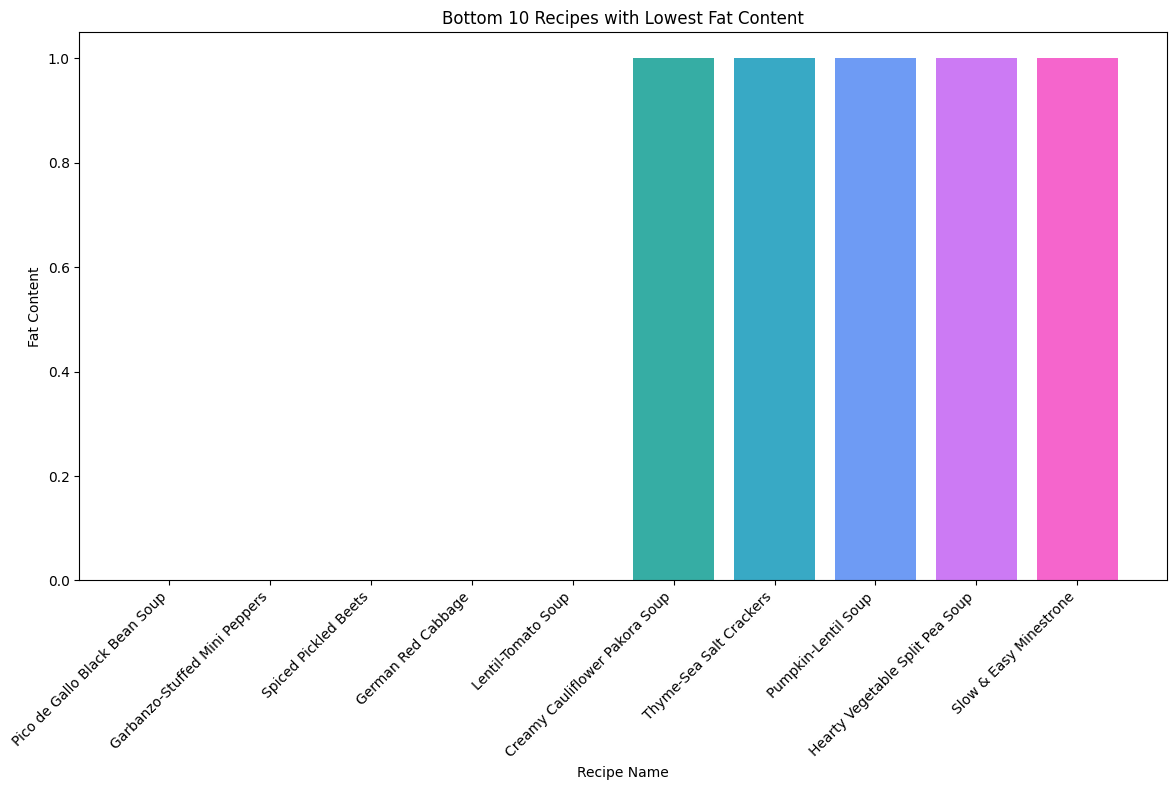

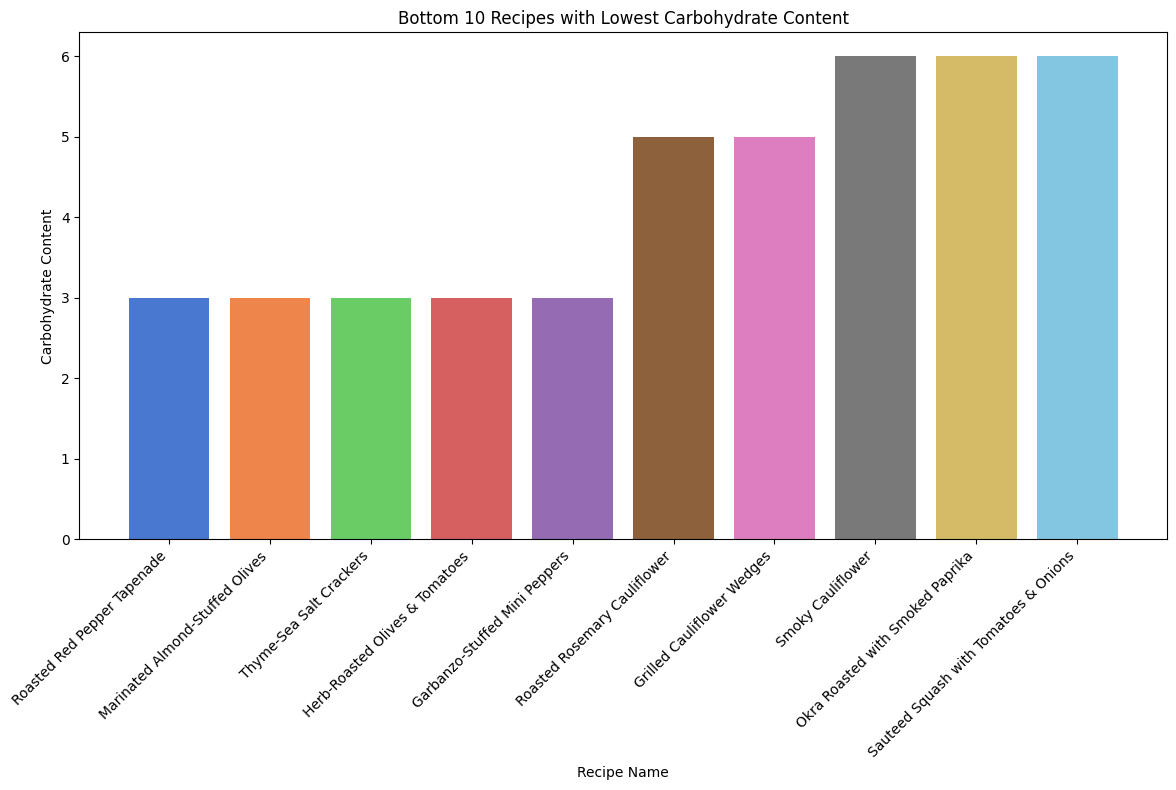

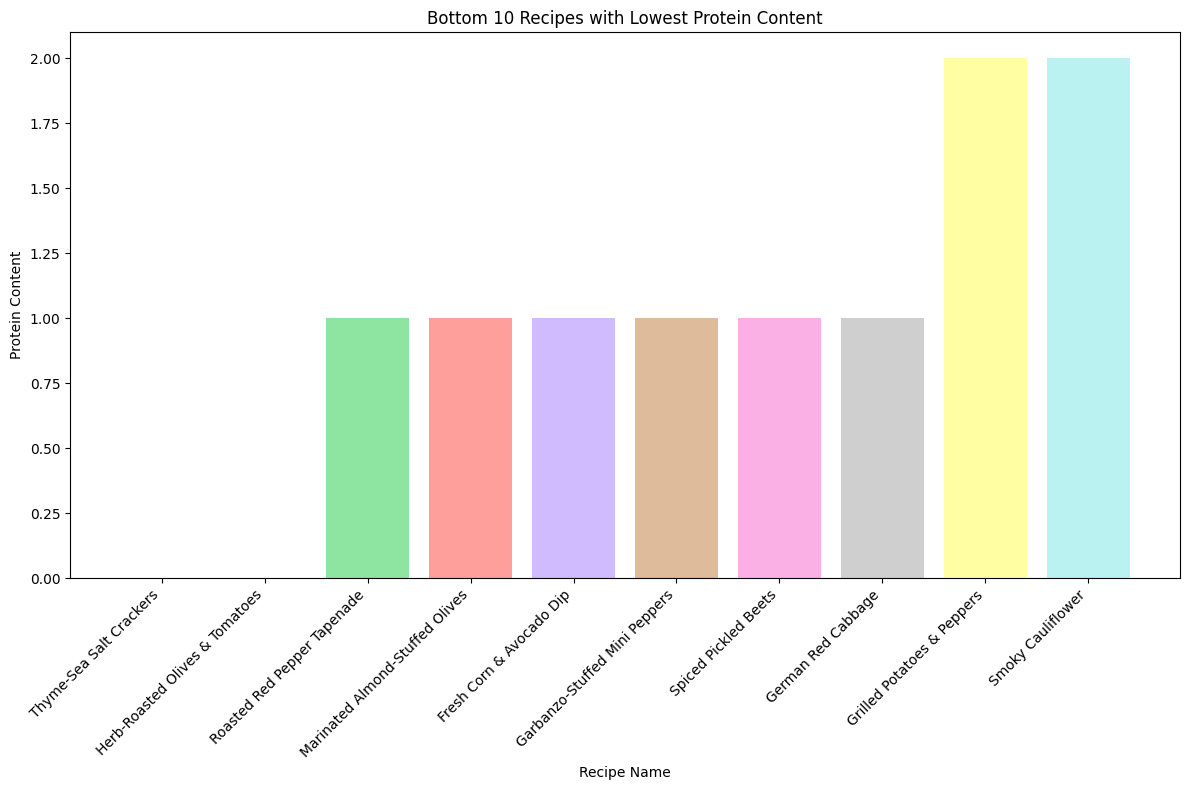

In [ ]:
# Sort the DataFrame by 'fat' in ascending order and select the bottom 10
bottom_10_fat = vegan.nsmallest(10, 'fat')
bottom_10_carbs = vegan.nsmallest(10, 'carbohydrate')
bottom_10_protein = vegan.nsmallest(10, 'protein')

# Define a function to plot bar charts
def plot_bottom_10(df, nutrient, color_palette):
    plt.figure(figsize=(12, 8))
    colors = sns.color_palette(color_palette, len(df))
    bars = plt.bar(df['name'], df[nutrient], color=colors)

    # Adding labels and title
    plt.xlabel('Recipe Name')
    plt.ylabel(f'{nutrient.capitalize()} Content')
    plt.title(f'Bottom 10 Recipes with Lowest {nutrient.capitalize()} Content')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Plotting the bar charts
plot_bottom_10(bottom_10_fat, 'fat', "husl")
plot_bottom_10(bottom_10_carbs, 'carbohydrate', "muted")
plot_bottom_10(bottom_10_protein, 'protein', "pastel")


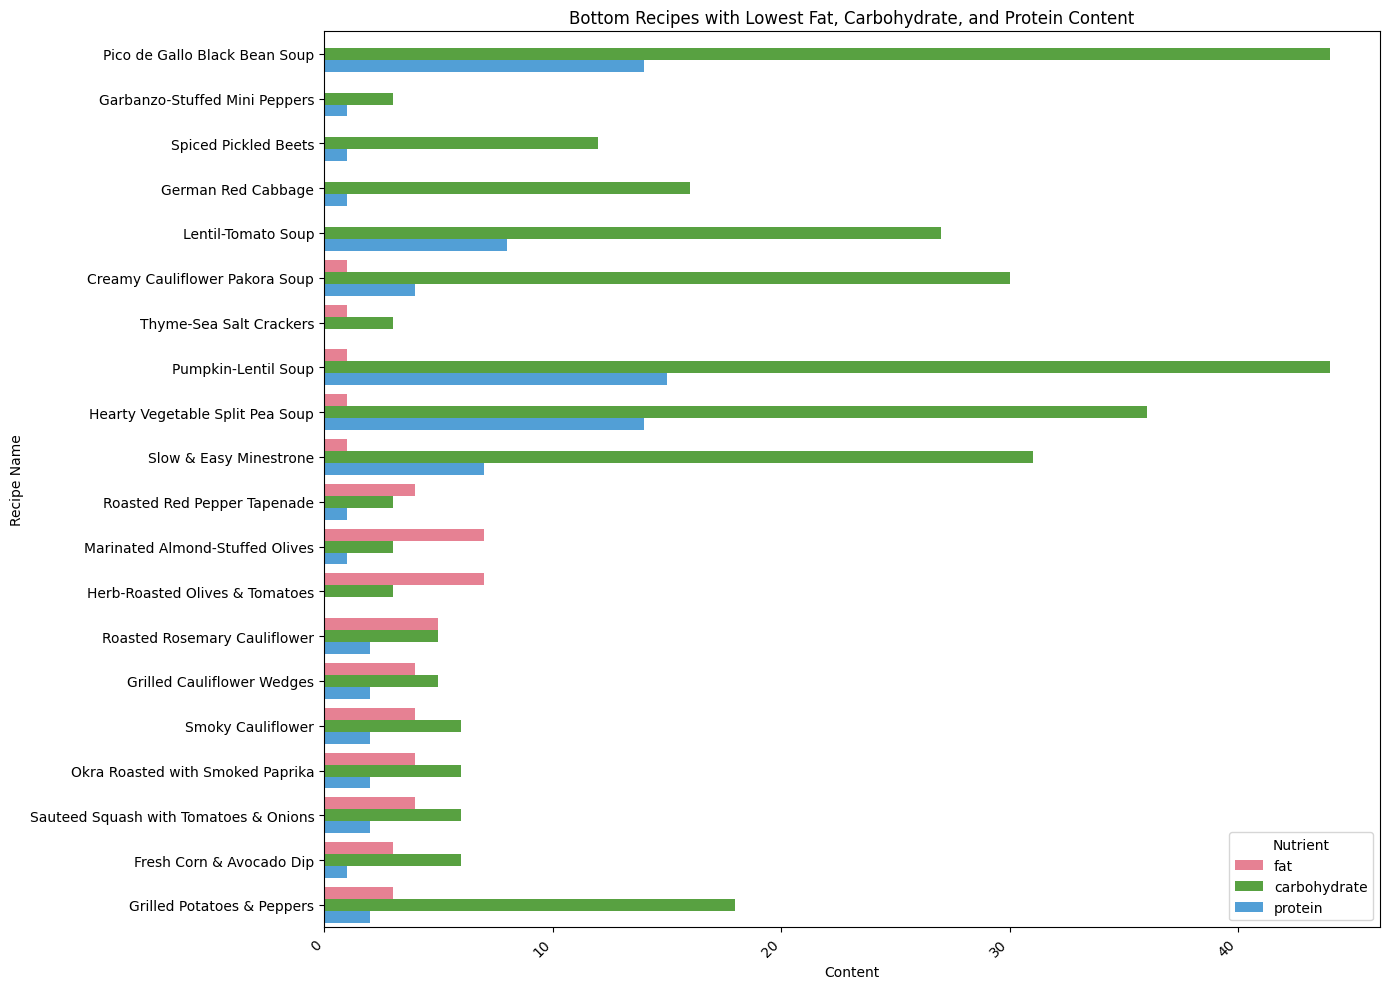

In [ ]:

# Sort the DataFrame by 'fat', 'carbohydrate', and 'protein' in ascending order and select the bottom 10 for each
bottom_10_fat = vegan.nsmallest(10, 'fat')
bottom_10_carbs = vegan.nsmallest(10, 'carbohydrate')
bottom_10_protein = vegan.nsmallest(10, 'protein')

# Combine the bottom 10 lists into a single DataFrame
bottom_nutrients = pd.concat([bottom_10_fat, bottom_10_carbs, bottom_10_protein]).drop_duplicates()

# Reshape the DataFrame for plotting
bottom_nutrients_melted = bottom_nutrients.melt(id_vars=['name'], value_vars=['fat', 'carbohydrate', 'protein'],
                                                var_name='Nutrient', value_name='Value')

# Plotting the combined bar chart
plt.figure(figsize=(14, 10))
sns.barplot(x='Value', y='name', hue='Nutrient', data=bottom_nutrients_melted, palette='husl')

# Adding labels and title
plt.xlabel('Content')
plt.ylabel('Recipe Name')
plt.title('Bottom Recipes with Lowest Fat, Carbohydrate, and Protein Content')
plt.legend(title='Nutrient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()
plt.show()


**Low-Protein Content Recipes**:

The recipes with the lowest protein contents are Roasted Red Pepper Tapenade, Marinated Almond Stuffed Olives, Herb Roasted Olive Oil and Tomatoes

**Low Carbohydrates Content Recipes**

The recipes with the lowest carb contents  are Roasted Red Pepper Tapenade, Marinated Almond Stuffed Olives, Herb Roasted Olive Oil and Tomatoes

**Low Fat Content Recipes**

The recipes with the lowest fat contents  are the Pico de Gallo Black Bean Soup, Garbanzo-Stuffed Mini- Pepper, Spiced Picked Beets, German Red Cabbage and Lentil Tomato Soup. Most of the fat contents here are zero.